In [1]:
import tqdm
import numpy as np

import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

from mnist_loader import MNISTDataset, train_test_split
from autoencoders import (
    SimpleEncoder, 
    SimpleDecoder, 
    DeepEncoder,
    DeepDecoder,
    AutoEncoder,
    ConvAutoEncoder,
)
from functions import train_model

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
torch.random.manual_seed(42)

LATENT_DIM = 20

In [3]:
mnist = datasets.MNIST('/home/andrei/datasets') 
# use data and targets only, supports __getitem__, 60000 images 28x28 px

In [4]:
train, test, plot_idx, labels = train_test_split(train_ratio=0.8, mnist=mnist)

In [5]:
image_transforms = transforms.ToTensor()
trainset = MNISTDataset(train, mnist, image_transforms)
testset = MNISTDataset(test, mnist, image_transforms)

In [6]:
trainloader = DataLoader(trainset, shuffle=True, batch_size=128, num_workers=2)
testloader = DataLoader(testset, shuffle=False, batch_size=128, num_workers=2)

In [7]:
encoder = SimpleEncoder(num_features=LATENT_DIM)
decoder = SimpleDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

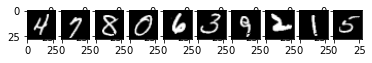

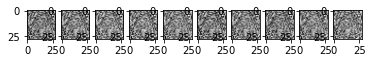

test loss: 65.31006395816803
 Epoch 0, train loss: 107.01650933921337, test loss: 19.267035365104675


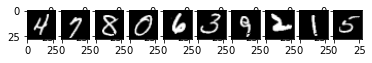

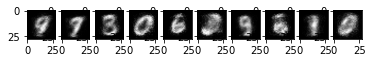

 Epoch 1, train loss: 69.63550393283367, test loss: 15.936018571257591


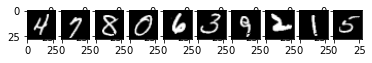

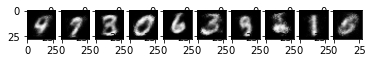

 Epoch 2, train loss: 60.840691581368446, test loss: 14.527517080307007


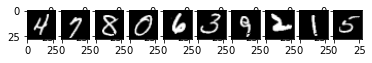

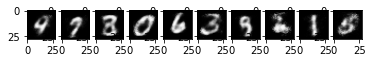

 Epoch 3, train loss: 56.70656180381775, test loss: 13.809929147362709
 Epoch 4, train loss: 54.52553842961788, test loss: 13.398062571883202
 Epoch 5, train loss: 53.137635722756386, test loss: 13.113692626357079
 Epoch 6, train loss: 52.141546651721, test loss: 12.892022363841534
 Epoch 7, train loss: 51.4314773529768, test loss: 12.747946098446846
 Epoch 8, train loss: 50.93800615519285, test loss: 12.648031689226627
 Epoch 9, train loss: 50.6281221807003, test loss: 12.589136384427547


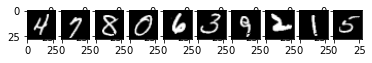

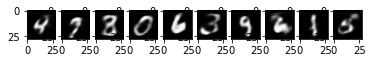

 Epoch 10, train loss: 50.418671652674675, test loss: 12.549264766275883
 Epoch 11, train loss: 50.28550221771002, test loss: 12.525128163397312
 Epoch 12, train loss: 50.17684247344732, test loss: 12.505995713174343
 Epoch 13, train loss: 50.103462271392345, test loss: 12.49401493370533
 Epoch 14, train loss: 50.03321823477745, test loss: 12.490019969642162
 Epoch 15, train loss: 49.978824362158775, test loss: 12.462066814303398
 Epoch 16, train loss: 49.93102486431599, test loss: 12.449866898357868
 Epoch 17, train loss: 49.88637366145849, test loss: 12.43218931555748
 Epoch 18, train loss: 49.8454172834754, test loss: 12.442564651370049
 Epoch 19, train loss: 49.810347497463226, test loss: 12.424636922776699


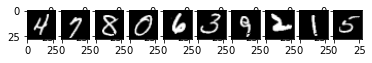

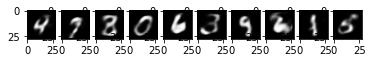

 Epoch 20, train loss: 49.775994047522545, test loss: 12.42226792871952
 Epoch 21, train loss: 49.74041999131441, test loss: 12.413425534963608
 Epoch 22, train loss: 49.711447797715664, test loss: 12.395107068121433
 Epoch 23, train loss: 49.67185613512993, test loss: 12.39267973601818
 Epoch 24, train loss: 49.64489945024252, test loss: 12.394554674625397
 Epoch 25, train loss: 49.62463974952698, test loss: 12.393606200814247
 Epoch 26, train loss: 49.600005842745304, test loss: 12.377398297190666
 Epoch 27, train loss: 49.57058301568031, test loss: 12.363852359354496
 Epoch 28, train loss: 49.54101435095072, test loss: 12.361133135855198
 Epoch 29, train loss: 49.52324955165386, test loss: 12.358533017337322


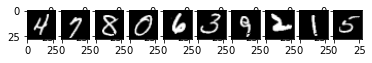

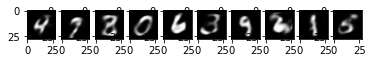

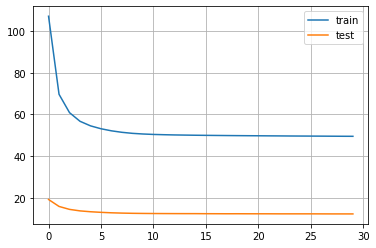

In [8]:
model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    image_transforms=image_transforms,
    loss_fn=loss_fn,
    mnist=mnist,
    trainloader=trainloader,
    testloader=testloader,
    plot_idx=plot_idx,
    epochs=30,
)

In [9]:
encoder = DeepEncoder(num_features=LATENT_DIM)
decoder = DeepDecoder(num_features=LATENT_DIM)

model = AutoEncoder(encoder, decoder)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

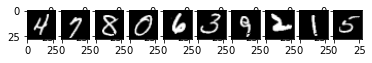

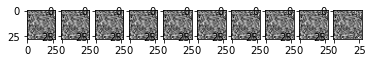

test loss: 65.14123129844666
 Epoch 0, train loss: 107.75656795501709, test loss: 22.476500526070595


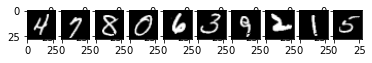

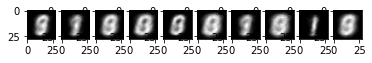

 Epoch 1, train loss: 81.19194017350674, test loss: 17.925946414470673


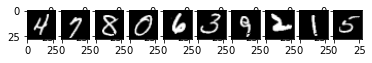

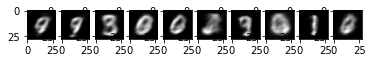

 Epoch 2, train loss: 67.53653021156788, test loss: 15.993969082832336


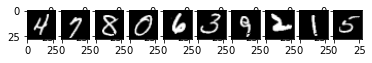

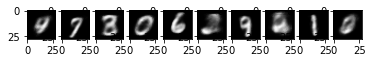

 Epoch 3, train loss: 62.38459871709347, test loss: 15.13102625310421
 Epoch 4, train loss: 59.404532223939896, test loss: 14.387818798422813
 Epoch 5, train loss: 56.6989698857069, test loss: 13.901992157101631
 Epoch 6, train loss: 55.06670023500919, test loss: 13.588113218545914
 Epoch 7, train loss: 53.81797733902931, test loss: 13.273710563778877
 Epoch 8, train loss: 52.73653392493725, test loss: 13.020032852888107
 Epoch 9, train loss: 51.4199003726244, test loss: 12.649631634354591


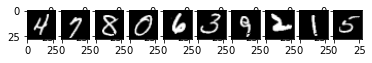

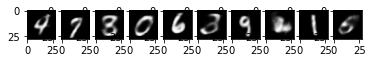

 Epoch 10, train loss: 50.003516755998135, test loss: 12.31849703937769
 Epoch 11, train loss: 48.9655806273222, test loss: 12.107896387577057
 Epoch 12, train loss: 48.24022947996855, test loss: 11.964909307658672
 Epoch 13, train loss: 47.663322389125824, test loss: 11.868377663195133
 Epoch 14, train loss: 47.202885389328, test loss: 11.728088565170765
 Epoch 15, train loss: 46.811245538294315, test loss: 11.658422946929932
 Epoch 16, train loss: 46.45696197450161, test loss: 11.589732058346272
 Epoch 17, train loss: 46.21789061278105, test loss: 11.50434935837984
 Epoch 18, train loss: 45.96978563070297, test loss: 11.474610567092896
 Epoch 19, train loss: 45.75580121576786, test loss: 11.431732140481472


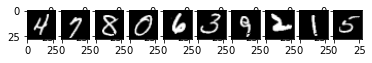

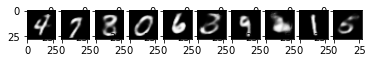

 Epoch 20, train loss: 45.58496734499931, test loss: 11.392228342592716
 Epoch 21, train loss: 45.437175177037716, test loss: 11.347738094627857
 Epoch 22, train loss: 45.28625187277794, test loss: 11.321608297526836
 Epoch 23, train loss: 45.158141158521175, test loss: 11.291827507317066
 Epoch 24, train loss: 45.04176885634661, test loss: 11.255219705402851
 Epoch 25, train loss: 44.92107494920492, test loss: 11.227957591414452
 Epoch 26, train loss: 44.812788374722004, test loss: 11.214906141161919
 Epoch 27, train loss: 44.70468878746033, test loss: 11.1836678981781
 Epoch 28, train loss: 44.60519804805517, test loss: 11.181061550974846
 Epoch 29, train loss: 44.524747140705585, test loss: 11.14416790008545


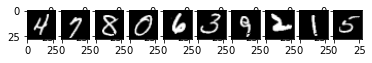

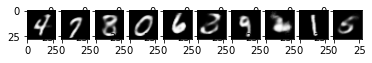

 Epoch 30, train loss: 44.43916092813015, test loss: 11.12799571454525
 Epoch 31, train loss: 44.34347788989544, test loss: 11.087100483477116
 Epoch 32, train loss: 44.24750518798828, test loss: 11.097949028015137
 Epoch 33, train loss: 44.18229625374079, test loss: 11.084530256688595
 Epoch 34, train loss: 44.10372843593359, test loss: 11.043924927711487
 Epoch 35, train loss: 44.021944753825665, test loss: 11.02691225707531
 Epoch 36, train loss: 43.93501205742359, test loss: 11.023541435599327
 Epoch 37, train loss: 43.86142785102129, test loss: 11.001084975898266
 Epoch 38, train loss: 43.80517440289259, test loss: 10.98274639248848
 Epoch 39, train loss: 43.74279375374317, test loss: 10.952187187969685


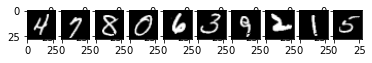

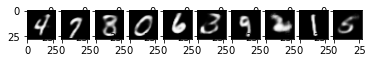

 Epoch 40, train loss: 43.67871690541506, test loss: 10.954681366682053
 Epoch 41, train loss: 43.61191178113222, test loss: 10.925161242485046
 Epoch 42, train loss: 43.556588016450405, test loss: 10.939663738012314
 Epoch 43, train loss: 43.488976180553436, test loss: 10.905598819255829
 Epoch 44, train loss: 43.43404450267553, test loss: 10.90613603591919
 Epoch 45, train loss: 43.362455666065216, test loss: 10.856445863842964
 Epoch 46, train loss: 43.29492075741291, test loss: 10.865929380059242
 Epoch 47, train loss: 43.248893328011036, test loss: 10.841217815876007
 Epoch 48, train loss: 43.19020716845989, test loss: 10.858932122588158
 Epoch 49, train loss: 43.14444252103567, test loss: 10.831413120031357


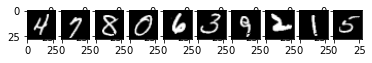

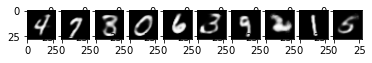

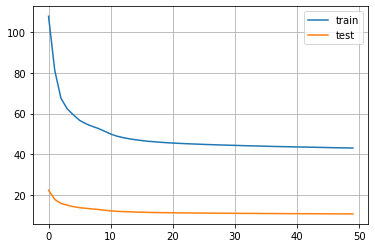

In [10]:
model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    image_transforms=image_transforms,
    loss_fn=loss_fn,
    mnist=mnist,
    trainloader=trainloader,
    testloader=testloader,
    plot_idx=plot_idx,
    epochs=50,
)

In [7]:

class ConvAutoEncoder(torch.nn.Module):
    def __init__(self):
        super(ConvAutoEncoder, self).__init__()
        self.conv0 = torch.nn.Conv2d(
            in_channels=1, out_channels=8, kernel_size=(3, 3), padding="same")
        self.conv1 = torch.nn.Conv2d(
            in_channels=8, out_channels=4, kernel_size=(3, 3), padding="same")
        self.conv2 = torch.nn.Conv2d(
            in_channels=4, out_channels=1, kernel_size=(3, 3), padding="same")
        self.pooling = torch.nn.MaxPool2d((2, 2))
        
        self.conv3 = torch.nn.Conv2d(
            in_channels=1, out_channels=4, kernel_size=(3, 3), padding="same")
        self.conv4 = torch.nn.Conv2d(
            in_channels=4, out_channels=8, kernel_size=(3, 3), padding="same")
        self.conv5 = torch.nn.Conv2d(
            in_channels=8, out_channels=1, kernel_size=(3, 3), padding="same")
        self.unpooling = torch.nn.Upsample(scale_factor=2)

    def forward(self, x: torch.tensor) -> torch.tensor:
        x = self.conv0(x)
        x = torch.nn.functional.relu(x)
        x = self.pooling(x)
        x = self.conv1(x)
        x = torch.nn.functional.relu(x)
        x = self.pooling(x)
        x = self.conv2(x)
        x = torch.nn.functional.relu(x)
        
        x = self.conv3(x)
        x = torch.nn.functional.relu(x)
        x = self.unpooling(x)
        x = self.conv4(x)
        x = torch.nn.functional.relu(x)
        x = self.unpooling(x)
        x = self.conv5(x)
        x = torch.nn.functional.relu(x)
        x = torch.sigmoid(x)

        return x, None


In [11]:
class ConvAutoEncoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
       
        #Encoder
        self.conv1 = torch.nn.Conv2d(1, 16, 3, padding=1)  
        self.conv2 = torch.nn.Conv2d(16, 4, 3, padding=1)
        self.pool = torch.nn.MaxPool2d(2, 2)
       
        #Decoder
        self.t_conv1 = torch.nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = torch.nn.ConvTranspose2d(16, 1, 2, stride=2)


    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.nn.functional.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.nn.functional.relu(self.t_conv1(x))
        x = torch.nn.functional.sigmoid(self.t_conv2(x))
              
        return x, None


In [12]:
model = ConvAutoEncoder()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()

In [13]:
image_transforms(mnist[0][0]).unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [14]:
model(image_transforms(mnist[0][0]).unsqueeze(0))[0].shape

torch.Size([1, 1, 28, 28])

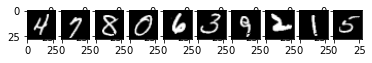

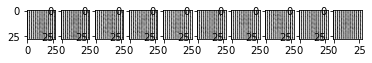

test loss: 58.2305


In [ ]:
model, optimizer = train_model(
    model=model,
    optimizer=optimizer,
    image_transforms=image_transforms,
    loss_fn=loss_fn,
    mnist=mnist,
    trainloader=trainloader,
    testloader=testloader,
    plot_idx=plot_idx
)